https://www.storybench.org/install-r-jupyter-notebook/

# DNA basics

In [1]:
install.packages("seqinr")


The downloaded binary packages are in
	/var/folders/07/ch803bln2x51cptcxk5bs3gr0000gn/T//RtmpH3EEwf/downloaded_packages


In [2]:
source("http://bioconductor.org/biocLite.R")
biocLite(c("DESeq","topGO"))

ERROR: Error: With R version 3.5 or greater, install Bioconductor packages using BiocManager; see https://bioconductor.org/install


In [3]:
library(seqinr)

In [5]:
corona <- read.fasta(file = "/Users/patsnap/Desktop/Neo4J_and_other_codes/RNA_gene_analysis/sequences.fasta")

In [6]:
coronaseq <- corona[[1]]

In [7]:
length(coronaseq)

[1] 29903

In [8]:
table(coronaseq)

coronaseq
   a    c    g    t 
8954 5492 5863 9594 

In [9]:
GC(coronaseq)

[1] 0.3797278

In [10]:
count(coronaseq, 1)


   a    c    g    t 
8954 5492 5863 9594 

In [12]:
count(coronaseq, 2)


  aa   ac   ag   at   ca   cc   cg   ct   ga   gc   gg   gt   ta   tc   tg   tt 
2880 2023 1742 2308 2084  888  439 2081 1612 1168 1093 1990 2377 1413 2589 3215 

In [13]:
starts <- seq(1, length(coronaseq)-2000, by = 2000)
n <- length(starts)
chunkGCs <- numeric(n)

In [14]:
for (i in 1:n) {
        chunk <- coronaseq[starts[i]:(starts[i]+1999)]
        chunkGC <- GC(chunk)
        print(chunkGC)
        chunkGCs[i] <- chunkGC
     }

[1] 0.43
[1] 0.3795
[1] 0.3685
[1] 0.3405
[1] 0.362
[1] 0.3735
[1] 0.393
[1] 0.3745
[1] 0.3795
[1] 0.3795
[1] 0.3455
[1] 0.3665
[1] 0.389
[1] 0.382


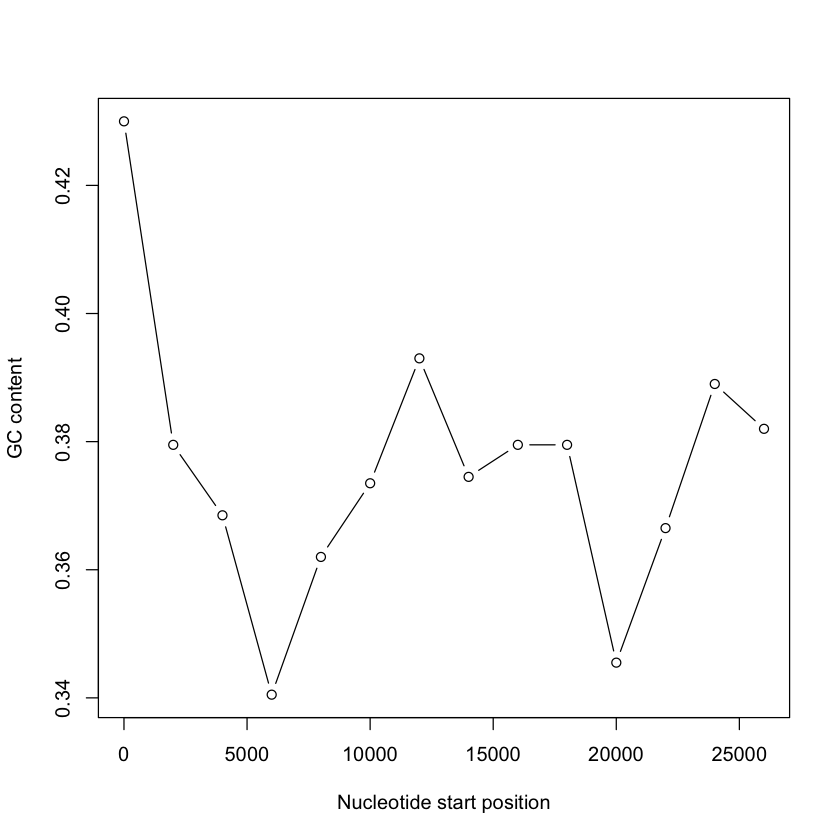

In [15]:
plot(starts,chunkGCs,type="b",xlab="Nucleotide start position",ylab="GC content")

# Sequence Alignment

In [16]:
install.packages("BiocManager")
BiocManager::install("Biostrings")


The downloaded binary packages are in
	/var/folders/07/ch803bln2x51cptcxk5bs3gr0000gn/T//RtmpH3EEwf/downloaded_packages


Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing package(s) 'BiocVersion', 'Biostrings'

also installing the dependencies ‘zlibbioc’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘XVector’





The downloaded binary packages are in
	/var/folders/07/ch803bln2x51cptcxk5bs3gr0000gn/T//RtmpH3EEwf/downloaded_packages


In [17]:
library("Biostrings")

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

In [53]:
covid <- readDNAStringSet("/Users/patsnap/Desktop/Neo4J_and_other_codes/RNA_gene_analysis/sequences.fasta")
covid

DNAStringSet object of length 1:
    width seq                                               names               
[1] 29903 ATTAAAGGTTTATACCTTCCCAG...AAAAAAAAAAAAAAAAAAAAAAA NC_045512.2 |Seve...

In [50]:
covid_aa <- translate(covid)
covid_aa

Warning message in .Call2("DNAStringSet_translate", x, skip_code, dna_codes[codon_alphabet], :
“last 2 bases were ignored”


AAStringSet object of length 1:
    width seq                                               names               
[1]  9967 IKGLYLPR*QTNQLSISCRSVL*...IPM*F**LLRRMTKKKKKKKKKK NC_045512.2 |Seve...

In [54]:
covid_seq = unlist(covid) # converts DNA string set to DNA string
print(length(covid_seq))
print(complement(covid))
print(reverseComplement(covid))

[1] 29903
DNAStringSet object of length 1:
    width seq                                               names               
[1] 29903 TAATTTCCAAATATGGAAGGGTC...TTTTTTTTTTTTTTTTTTTTTTT NC_045512.2 |Seve...
DNAStringSet object of length 1:
    width seq                                               names               
[1] 29903 TTTTTTTTTTTTTTTTTTTTTTT...CTGGGAAGGTATAAACCTTTAAT NC_045512.2 |Seve...


In [55]:
letterFrequency(covid_seq, "A")

A 
8954

In [56]:
letterFrequency(covid_seq, "GC")

G|C 
11355

In [57]:
dinucleotideFrequency(covid_seq) 

AA   AC   AG   AT   CA   CC   CG   CT   GA   GC   GG   GT   TA   TC   TG   TT 
2880 2023 1742 2308 2084  888  439 2081 1612 1168 1093 1990 2377 1413 2589 3215

In [58]:
trinucleotideFrequency(covid_seq)

AAA  AAC  AAG  AAT  ACA  ACC  ACG  ACT  AGA  AGC  AGG  AGT  ATA  ATC  ATG  ATT 
 923  615  580  761  809  376  164  674  605  301  329  507  471  339  725  773 
 CAA  CAC  CAG  CAT  CCA  CCC  CCG  CCT  CGA  CGC  CGG  CGT  CTA  CTC  CTG  CTT 
 703  459  438  484  354  116   74  344   95   97   76  171  561  287  495  738 
 GAA  GAC  GAG  GAT  GCA  GCC  GCG  GCT  GGA  GGC  GGG  GGT  GTA  GTC  GTG  GTT 
 535  340  297  440  372  187   88  521  282  223  134  454  469  269  552  700 
 TAA  TAC  TAG  TAT  TCA  TCC  TCG  TCT  TGA  TGC  TGG  TGT  TTA  TTC  TTG  TTT 
 719  609  427  622  549  209  113  542  630  547  554  858  876  518  817 1004

In [59]:
BiocManager::install("Biobase")
BiocManager::install("BSgenome")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing package(s) 'Biobase'




The downloaded binary packages are in
	/var/folders/07/ch803bln2x51cptcxk5bs3gr0000gn/T//RtmpH3EEwf/downloaded_packages


Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing package(s) 'BSgenome'




The downloaded binary packages are in
	/var/folders/07/ch803bln2x51cptcxk5bs3gr0000gn/T//RtmpH3EEwf/downloaded_packages


In [61]:
library(Biobase)
library(BSgenome)

Loading required package: rtracklayer



In [62]:
available.genomes()

[1] "BSgenome.Alyrata.JGI.v1"                  
 [2] "BSgenome.Amellifera.BeeBase.assembly4"    
 [3] "BSgenome.Amellifera.UCSC.apiMel2"         
 [4] "BSgenome.Amellifera.UCSC.apiMel2.masked"  
 [5] "BSgenome.Aofficinalis.NCBI.V1"            
 [6] "BSgenome.Athaliana.TAIR.04232008"         
 [7] "BSgenome.Athaliana.TAIR.TAIR9"            
 [8] "BSgenome.Btaurus.UCSC.bosTau3"            
 [9] "BSgenome.Btaurus.UCSC.bosTau3.masked"     
[10] "BSgenome.Btaurus.UCSC.bosTau4"            
[11] "BSgenome.Btaurus.UCSC.bosTau4.masked"     
[12] "BSgenome.Btaurus.UCSC.bosTau6"            
[13] "BSgenome.Btaurus.UCSC.bosTau6.masked"     
[14] "BSgenome.Btaurus.UCSC.bosTau8"            
[15] "BSgenome.Btaurus.UCSC.bosTau9"            
[16] "BSgenome.Carietinum.NCBI.v1"              
[17] "BSgenome.Celegans.UCSC.ce10"              
[18] "BSgenome.Celegans.UCSC.ce11"              
[19] "BSgenome.Celegans.UCSC.ce2"               
[20] "BSgenome.Celegans.UCSC.ce6"               
[21] "BSgenome.Cfamiliaris.UCSC.canFam2"        
[22] "BSgenome.Cfamiliaris.UCSC.canFam2.masked" 
[23] "BSgenome.Cfamiliaris.UCSC.canFam3"        
[24] "BSgenome.Cfamiliaris.UCSC.canFam3.masked" 
[25] "BSgenome.Cjacchus.UCSC.calJac3"           
[26] "BSgenome.Dmelanogaster.UCSC.dm2"          
[27] "BSgenome.Dmelanogaster.UCSC.dm2.masked"   
[28] "BSgenome.Dmelanogaster.UCSC.dm3"          
[29] "BSgenome.Dmelanogaster.UCSC.dm3.masked"   
[30] "BSgenome.Dmelanogaster.UCSC.dm6"          
[31] "BSgenome.Drerio.UCSC.danRer10"            
[32] "BSgenome.Drerio.UCSC.danRer11"            
[33] "BSgenome.Drerio.UCSC.danRer5"             
[34] "BSgenome.Drerio.UCSC.danRer5.masked"      
[35] "BSgenome.Drerio.UCSC.danRer6"             
[36] "BSgenome.Drerio.UCSC.danRer6.masked"      
[37] "BSgenome.Drerio.UCSC.danRer7"             
[38] "BSgenome.Drerio.UCSC.danRer7.masked"      
[39] "BSgenome.Dvirilis.Ensembl.dvircaf1"       
[40] "BSgenome.Ecoli.NCBI.20080805"             
[41] "BSgenome.Gaculeatus.UCSC.gasAcu1"         
[42] "BSgenome.Gaculeatus.UCSC.gasAcu1.masked"  
[43] "BSgenome.Ggallus.UCSC.galGal3"            
[44] "BSgenome.Ggallus.UCSC.galGal3.masked"     
[45] "BSgenome.Ggallus.UCSC.galGal4"            
[46] "BSgenome.Ggallus.UCSC.galGal4.masked"     
[47] "BSgenome.Ggallus.UCSC.galGal5"            
[48] "BSgenome.Ggallus.UCSC.galGal6"            
[49] "BSgenome.Hsapiens.1000genomes.hs37d5"     
[50] "BSgenome.Hsapiens.NCBI.GRCh38"            
[51] "BSgenome.Hsapiens.UCSC.hg17"              
[52] "BSgenome.Hsapiens.UCSC.hg17.masked"       
[53] "BSgenome.Hsapiens.UCSC.hg18"              
[54] "BSgenome.Hsapiens.UCSC.hg18.masked"       
[55] "BSgenome.Hsapiens.UCSC.hg19"              
[56] "BSgenome.Hsapiens.UCSC.hg19.masked"       
[57] "BSgenome.Hsapiens.UCSC.hg38"              
[58] "BSgenome.Hsapiens.UCSC.hg38.masked"       
[59] "BSgenome.Mdomestica.UCSC.monDom5"         
[60] "BSgenome.Mfascicularis.NCBI.5.0"          
[61] "BSgenome.Mfuro.UCSC.musFur1"              
[62] "BSgenome.Mmulatta.UCSC.rheMac10"          
[63] "BSgenome.Mmulatta.UCSC.rheMac2"           
[64] "BSgenome.Mmulatta.UCSC.rheMac2.masked"    
[65] "BSgenome.Mmulatta.UCSC.rheMac3"           
[66] "BSgenome.Mmulatta.UCSC.rheMac3.masked"    
[67] "BSgenome.Mmulatta.UCSC.rheMac8"           
[68] "BSgenome.Mmusculus.UCSC.mm10"             
[69] "BSgenome.Mmusculus.UCSC.mm10.masked"      
[70] "BSgenome.Mmusculus.UCSC.mm8"              
[71] "BSgenome.Mmusculus.UCSC.mm8.masked"       
[72] "BSgenome.Mmusculus.UCSC.mm9"              
[73] "BSgenome.Mmusculus.UCSC.mm9.masked"       
[74] "BSgenome.Osativa.MSU.MSU7"                
[75] "BSgenome.Ptroglodytes.UCSC.panTro2"       
[76] "BSgenome.Ptroglodytes.UCSC.panTro2.masked"
[77] "BSgenome.Ptroglodytes.UCSC.panTro3"       
[78] "BSgenome.Ptroglodytes.UCSC.panTro3.masked"
[79] "BSgenome.Ptroglodytes.UCSC.panTro5"       
[80] "BSgenome.Ptroglodytes.UCSC.panTro6"       
[81] "BSgenome.Rnorvegicus.UCSC.rn4"            
[82] "BSgenome.Rnorvegicus.UCSC.

In [64]:
BiocManager::install('BSgenome.Hsapiens.UCSC.hg19')
library(BSgenome.Hsapiens.UCSC.hg19)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing package(s) 'BSgenome.Hsapiens.UCSC.hg19'

installing the source package ‘BSgenome.Hsapiens.UCSC.hg19’




In [65]:
human <- BSgenome.Hsapiens.UCSC.hg19
print(length(human))
print(names(human))
print(seqlengths(human))

[1] 298
  [1] "chr1"                  "chr2"                  "chr3"                 
  [4] "chr4"                  "chr5"                  "chr6"                 
  [7] "chr7"                  "chr8"                  "chr9"                 
 [10] "chr10"                 "chr11"                 "chr12"                
 [13] "chr13"                 "chr14"                 "chr15"                
 [16] "chr16"                 "chr17"                 "chr18"                
 [19] "chr19"                 "chr20"                 "chr21"                
 [22] "chr22"                 "chrX"                  "chrY"                 
 [25] "chrM"                  "chrMT"                 "chr4_ctg9_hap1"       
 [28] "chr6_apd_hap1"         "chr6_cox_hap2"         "chr6_dbb_hap3"        
 [31] "chr6_mann_hap4"        "chr6_mcf_hap5"         "chr6_qbl_hap6"        
 [34] "chr6_ssto_hap7"        "chr17_ctg5_hap1"       "chr1_gl000191_random" 
 [37] "chr1_gl000192_random"  "chr4_gl000193_random"  "c

In [67]:
BiocManager::install('BSgenome.Scerevisiae.UCSC.sacCer3')
library(BSgenome.Scerevisiae.UCSC.sacCer3)

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.1 (2020-06-06)

Installing package(s) 'BSgenome.Scerevisiae.UCSC.sacCer3'

installing the source package ‘BSgenome.Scerevisiae.UCSC.sacCer3’




In [68]:
yeast <- BSgenome.Scerevisiae.UCSC.sacCer3

In [69]:
print(length(yeast))
print(names(yeast))
print(seqlengths(yeast))

[1] 17
 [1] "chrI"    "chrII"   "chrIII"  "chrIV"   "chrV"    "chrVI"   "chrVII" 
 [8] "chrVIII" "chrIX"   "chrX"    "chrXI"   "chrXII"  "chrXIII" "chrXIV" 
[15] "chrXV"   "chrXVI"  "chrM"   
   chrI   chrII  chrIII   chrIV    chrV   chrVI  chrVII chrVIII   chrIX    chrX 
 230218  813184  316620 1531933  576874  270161 1090940  562643  439888  745751 
  chrXI  chrXII chrXIII  chrXIV   chrXV  chrXVI    chrM 
 666816 1078177  924431  784333 1091291  948066   85779 


In [72]:
yeast_dna <- getSeq(yeast)   #DNAString Set

In [73]:
yeast_seq <- unlist(yeast_dna) #DNA string
yeast_seq

12157105-letter DNAString object
seq: CCACACCACACCCACACACCCACACACCACACCACA...TACAGAAATATGCTTAATTATAATATAATATCCATA

In [75]:
matchPattern(pattern = "CCACA", subject = yeast_seq, max.mismatch = 2)

Views on a 12157105-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...CAGAAATATGCTTAATTATAATATAATATCCATA
views:
               start      end width
        [1]        1        5     5 [CCACA]
        [2]        3        7     5 [ACACC]
        [3]        4        8     5 [CACCA]
        [4]        6       10     5 [CCACA]
        [5]        8       12     5 [ACACC]
        ...      ...      ...   ... ...
  [1122850] 12156987 12156991     5 [CCCCT]
  [1122851] 12157006 12157010     5 [CCATA]
  [1122852] 12157069 12157073     5 [ATACA]
  [1122853] 12157071 12157075     5 [ACAGA]
  [1122854] 12157101 12157105     5 [CCATA]

In [77]:
MSH2 <- readDNAStringSet("/Users/patsnap/Desktop/Neo4J_and_other_codes/RNA_gene_analysis/S288C_YOL090W_MSH2_genomic.fsa")
MSH2

DNAStringSet object of length 1:
    width seq                                               names               
[1]  2895 ATGTCCTCCACTAGGCCAGAGCT...ATATAAAAGCCTTGTTGTTATAA MSH2 YOL090W SGDI...

In [79]:
#Matches this yeast gene snippet in the yeast gene sequence
MSH2_seq <- unlist(MSH2)
MSH2_seq

2895-letter DNAString object
seq: ATGTCCTCCACTAGGCCAGAGCTAAAATTCTCTGAT...AATTACCTGAAATATATAAAAGCCTTGTTGTTATAA

In [81]:
matchPattern(pattern = MSH2_seq, subject = yeast_seq, max.mismatch = 0)

Views on a 12157105-letter DNAString subject
subject: CCACACCACACCCACACACCCACACACCACACCA...CAGAAATATGCTTAATTATAATATAATATCCATA
views:
         start      end width
  [1] 10179351 10182245  2895 [ATGTCCTCCACTAGGCCAGAGCT...TATAAAAGCCTTGTTGTTATAA]

In [84]:
countPattern(pattern = MSH2_seq, subject = yeast_seq, max.mismatch = 0)

[1] 1

In [87]:
MSH2_in_yeast <- subseq(yeast_seq, start= 10179351, end=10182245)
MSH2_in_yeast

2895-letter DNAString object
seq: ATGTCCTCCACTAGGCCAGAGCTAAAATTCTCTGAT...AATTACCTGAAATATATAAAAGCCTTGTTGTTATAA